In [1]:
%load_ext lab_black

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import warnings
import os
import zipfile

warnings.filterwarnings(action="ignore")

In [3]:
data = "/home/sharoonsaxena/Datasets/cats-vs-dogs.zip"
zip_ref = zipfile.ZipFile(data, "r")
zip_ref.extractall("/home/sharoonsaxena/Datasets/extracted/")
zip_ref.close()

In [3]:
# the base address of the data folder
base_dir = "/home/sharoonsaxena/Datasets/extracted/cats-vs-dogs"

# Address of the training and validation folders
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

# dogs and cat folders within training
train_dogs_dir = os.path.join(train_dir, "dogs")
train_cats_dir = os.path.join(train_dir, "cats")

# dogs and cats within validation folder
validation_dogs_dir = os.path.join(validation_dir, "dogs")
validation_cats_dir = os.path.join(validation_dir, "cats")

In [4]:
# finding out number od images in the respective directories
print("total training cat images :", len(os.listdir(train_cats_dir)))
print("total training dog images :", len(os.listdir(train_dogs_dir)))

print("total validation cat images :", len(os.listdir(validation_cats_dir)))
print("total validation dog images :", len(os.listdir(validation_dogs_dir)))

total training cat images : 12300
total training dog images : 12300
total validation cat images : 200
total validation dog images : 200


In [5]:
model = tf.keras.models.Sequential(
    [
        # Note the input shape is the desired size of the image 150x150 with 3 bytes color
        tf.keras.layers.Conv2D(
            16, (3, 3), activation="relu", input_shape=(150, 150, 3)
        ),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation="relu"),
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"]
)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescaling images
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# input flow of training images
train_generator = train_datagen.flow_from_directory(
    train_dir, batch_size=2460, class_mode="binary", target_size=(150, 150)
)

# input flow from validation images
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, batch_size=200, class_mode="binary", target_size=(150, 150)
)

Found 24600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [9]:
history = model.fit_generator(
    train_generator, validation_data=validation_generator, epochs=20
)

Epoch 1/20
10/10 [==============================] - 308s 31s/step - loss: 1.6987 - accuracy: 0.4929 - val_loss: 0.6899 - val_accuracy: 0.6125
Epoch 2/20
10/10 [==============================] - 386s 37s/step - loss: 0.6899 - accuracy: 0.5527 - val_loss: 0.6759 - val_accuracy: 0.5925
Epoch 3/20
10/10 [==============================] - 398s 39s/step - loss: 0.6739 - accuracy: 0.5715 - val_loss: 0.7953 - val_accuracy: 0.5025
Epoch 4/20
10/10 [==============================] - 379s 37s/step - loss: 0.6803 - accuracy: 0.5787 - val_loss: 0.6535 - val_accuracy: 0.6500
Epoch 5/20
10/10 [==============================] - 402s 38s/step - loss: 0.6557 - accuracy: 0.6196 - val_loss: 0.6768 - val_accuracy: 0.5375
Epoch 6/20
10/10 [==============================] - 389s 37s/step - loss: 0.6695 - accuracy: 0.6126 - val_loss: 0.6395 - val_accuracy: 0.6825
Epoch 7/20
10/10 [==============================] - 367s 36s/step - loss: 0.6496 - accuracy: 0.6189 - val_loss: 0.6310 - val_accuracy: 0.6600
Epoch 

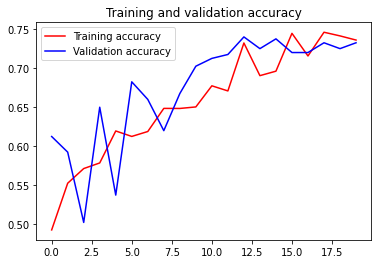

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend(loc=0)
plt.figure()


plt.show()